<a href="https://colab.research.google.com/github/chanchalmittal/Population-by-the-sex-ratio/blob/main/student_perfomance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import files
files.upload()

In [3]:
! pip install kaggle

In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle/

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
! kaggle datasets list -s students

ref                                                               title                                               size  lastUpdated          downloadCount  
----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
spscientist/students-performance-in-exams                         Students Performance in Exams                        9KB  2018-11-09 18:25:25         111470  
aljarah/xAPI-Edu-Data                                             Students' Academic Performance Dataset               6KB  2016-11-26 21:58:24          38082  
janiobachmann/math-students                                       Math Students                                        7KB  2017-10-10 20:17:23           3003  
kwadwoofosu/predict-test-scores-of-students                       Predict Test Scores of students                     21KB  2021-05-11 15:02:19           2659  
namanmanchanda/entrepreneurial-com

In [8]:
! kaggle datasets download -d spscientist/students-performance-in-exams

  0% 0.00/8.70k [00:00<?, ?B/s]
100% 8.70k/8.70k [00:00<00:00, 7.59MB/s]


In [9]:
!unzip \*.zip 

Archive:  students-performance-in-exams.zip
  inflating: StudentsPerformance.csv  


In [10]:
df = pd.read_csv('StudentsPerformance.csv')
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [11]:
df.head(10).style.set_properties(**{'background-color': 'black',                                                   
                                    'color': 'lawngreen',                       
                                    'border-color': 'white'})


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [12]:
df.describe()                    #it is used to view some basic statistical details 

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [13]:
df.head(10).style.set_properties(**{'background-color': 'snow',                                                   
                                    'color': 'red',                       
                                    'border-color': 'maroon'})


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [14]:
df.head(10).style.background_gradient(cmap="Set1")                          #compare

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


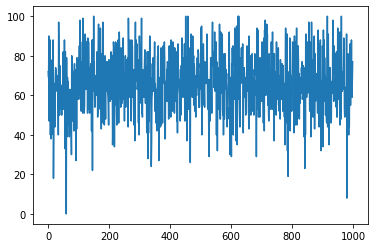

In [15]:
df['math score'].plot()

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        
df.head(10).style.background_gradient(cmap = 'autumn')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
5,0,1,0,1,1,71,83,78
6,0,1,4,1,0,88,95,92
7,1,1,4,0,1,40,43,39
8,1,3,2,0,0,64,64,67
9,0,1,2,0,1,38,60,50


In [18]:
for c in df.columns:
    if df[c].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[c].values))
        df[c] = lbl.transform(df[c].values)
        
df.head(10).style.background_gradient(cmap = 'cubehelix')

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,1,1,1,1,72,72,74
1,0,2,4,1,0,69,90,88
2,0,1,3,1,1,90,95,93
3,1,0,0,0,1,47,57,44
4,1,2,4,1,1,76,78,75
5,0,1,0,1,1,71,83,78
6,0,1,4,1,0,88,95,92
7,1,1,4,0,1,40,43,39
8,1,3,2,0,0,64,64,67
9,0,1,2,0,1,38,60,50


In [19]:
df.describe().T.style.bar(subset=['mean'], color='#205ff2')\
                            .background_gradient(subset=['std'], cmap='Reds')\
                             .background_gradient(subset=['50%'], cmap='twilight')

,count,mean,std,min,25%,50%,75%,max
gender,1000.000000,0.482000,0.499926,0.000000,0.000000,0.000000,1.000000,1.000000
race/ethnicity,1000.000000,2.174000,1.157179,0.000000,1.000000,2.000000,3.000000,4.000000
parental level of education,1000.000000,2.486000,1.829522,0.000000,1.000000,2.000000,4.000000,5.000000
lunch,1000.000000,0.645000,0.478753,0.000000,0.000000,1.000000,1.000000,1.000000
test preparation course,1000.000000,0.642000,0.479652,0.000000,0.000000,1.000000,1.000000,1.000000
math score,1000.000000,66.089000,15.163080,0.000000,57.000000,66.000000,77.000000,100.000000
reading score,1000.000000,69.169000,14.600192,17.000000,59.000000,70.000000,79.000000,100.000000
writing score,1000.000000,68.054000,15.195657,10.000000,57.750000,69.000000,79.000000,100.000000


In [20]:
sns.set_theme(style="darkgrid")

###Plots of reading score V/S maths score

Text(0.5, 1.0, 'reading score V/S maths score')

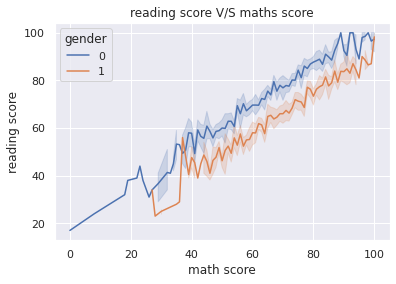

In [21]:
sns.lineplot(x="math score", 
             y="reading score",
             hue="gender",
             data=df)
plt.title("reading score V/S maths score")

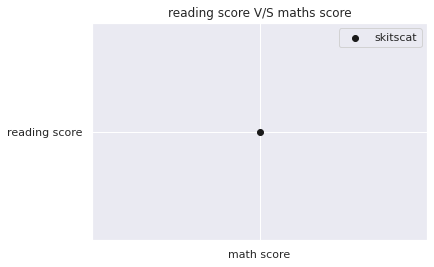

In [23]:
X = ("math score")
Y = ("reading score")
              

plt.scatter(X,Y,label='skitscat',color='k')

plt.title("reading score V/S maths score")     #to add title
                 
plt.legend()
plt.show()







###Plot of writing score V/S math score

Text(0.5, 1.0, 'writing score V/S maths score')

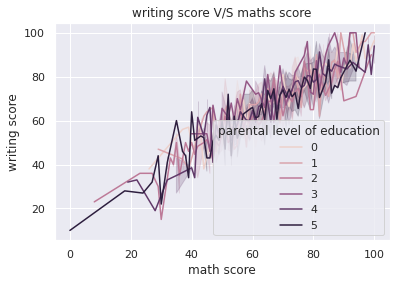

In [24]:
sns.lineplot(x="math score", y="writing score",
              hue="parental level of education",
             data=df)

plt.title("writing score V/S maths score")

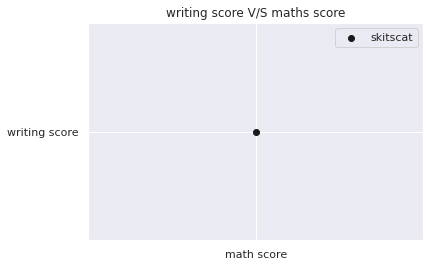

In [25]:
X = ("math score")
Y = ("writing score")
              

plt.scatter(X,Y,label='skitscat',color='k')

plt.title("writing score V/S maths score")     #to add title
                 
plt.legend()
plt.show()

###Lineplots to understand the relationship

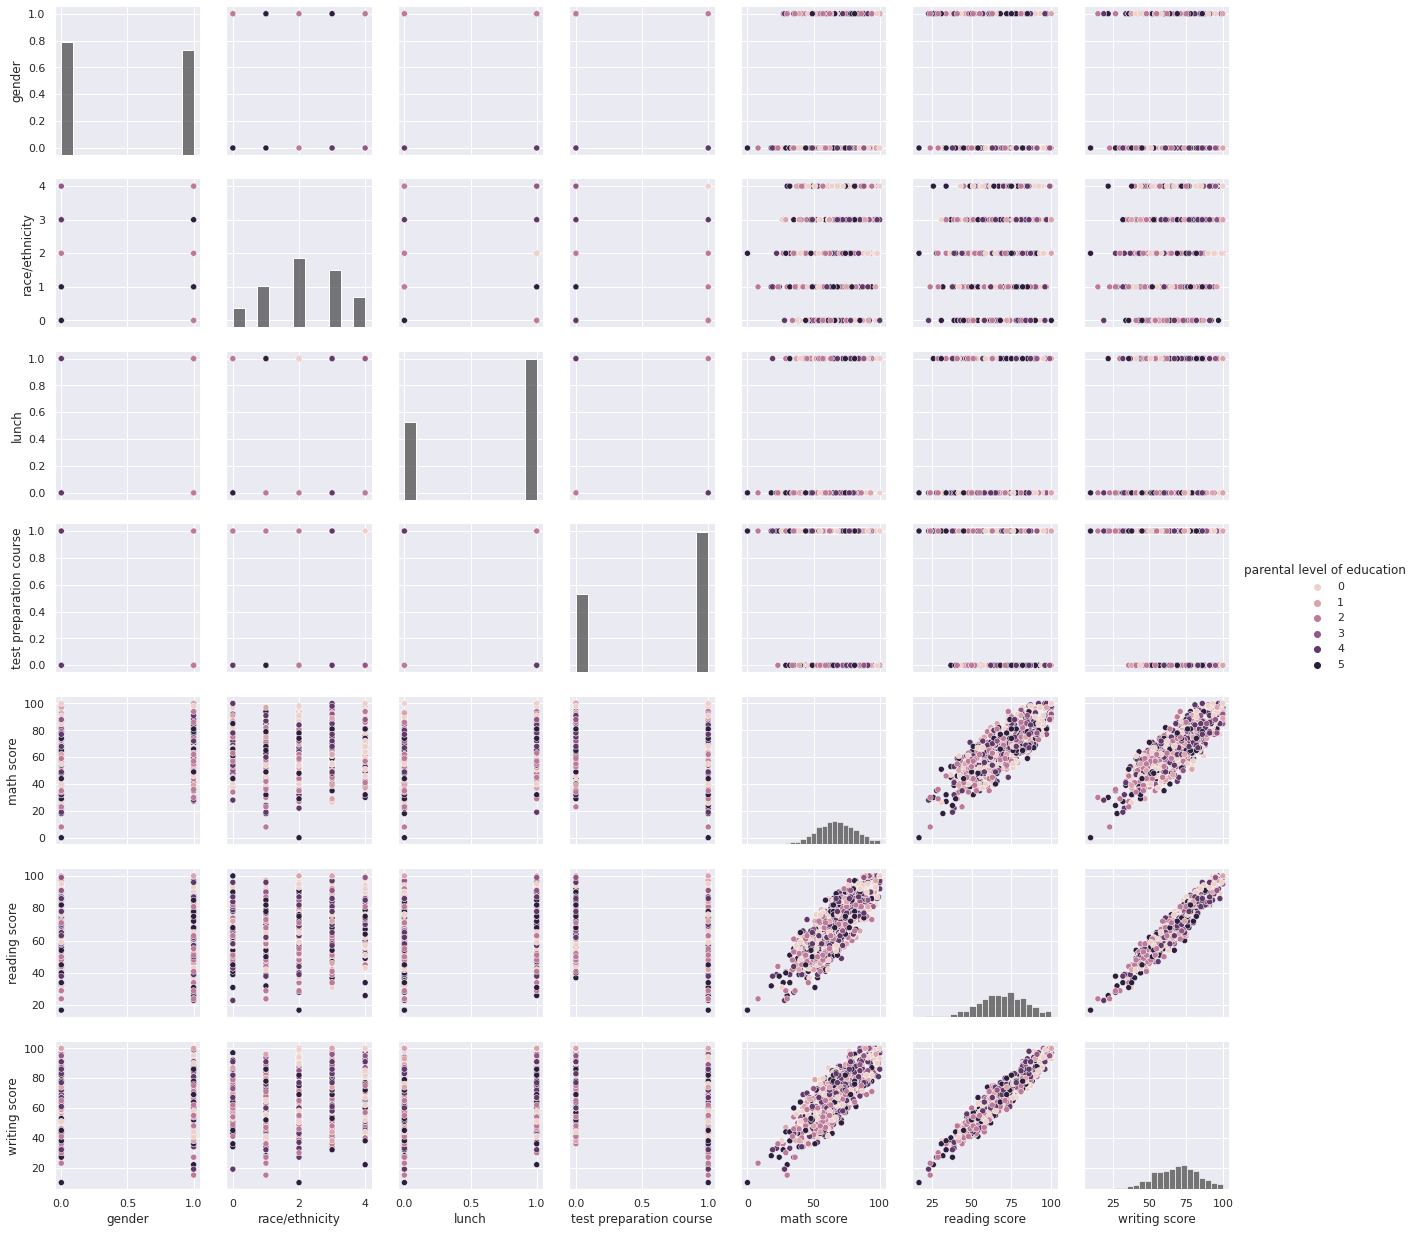

In [26]:
g = sns.PairGrid(df, hue="parental level of education")
g.map_diag(sns.histplot, hue=None, color=".3")
g.map_offdiag(sns.scatterplot)
g.add_legend()

###Scatterplot matrix with respect to parental level of education

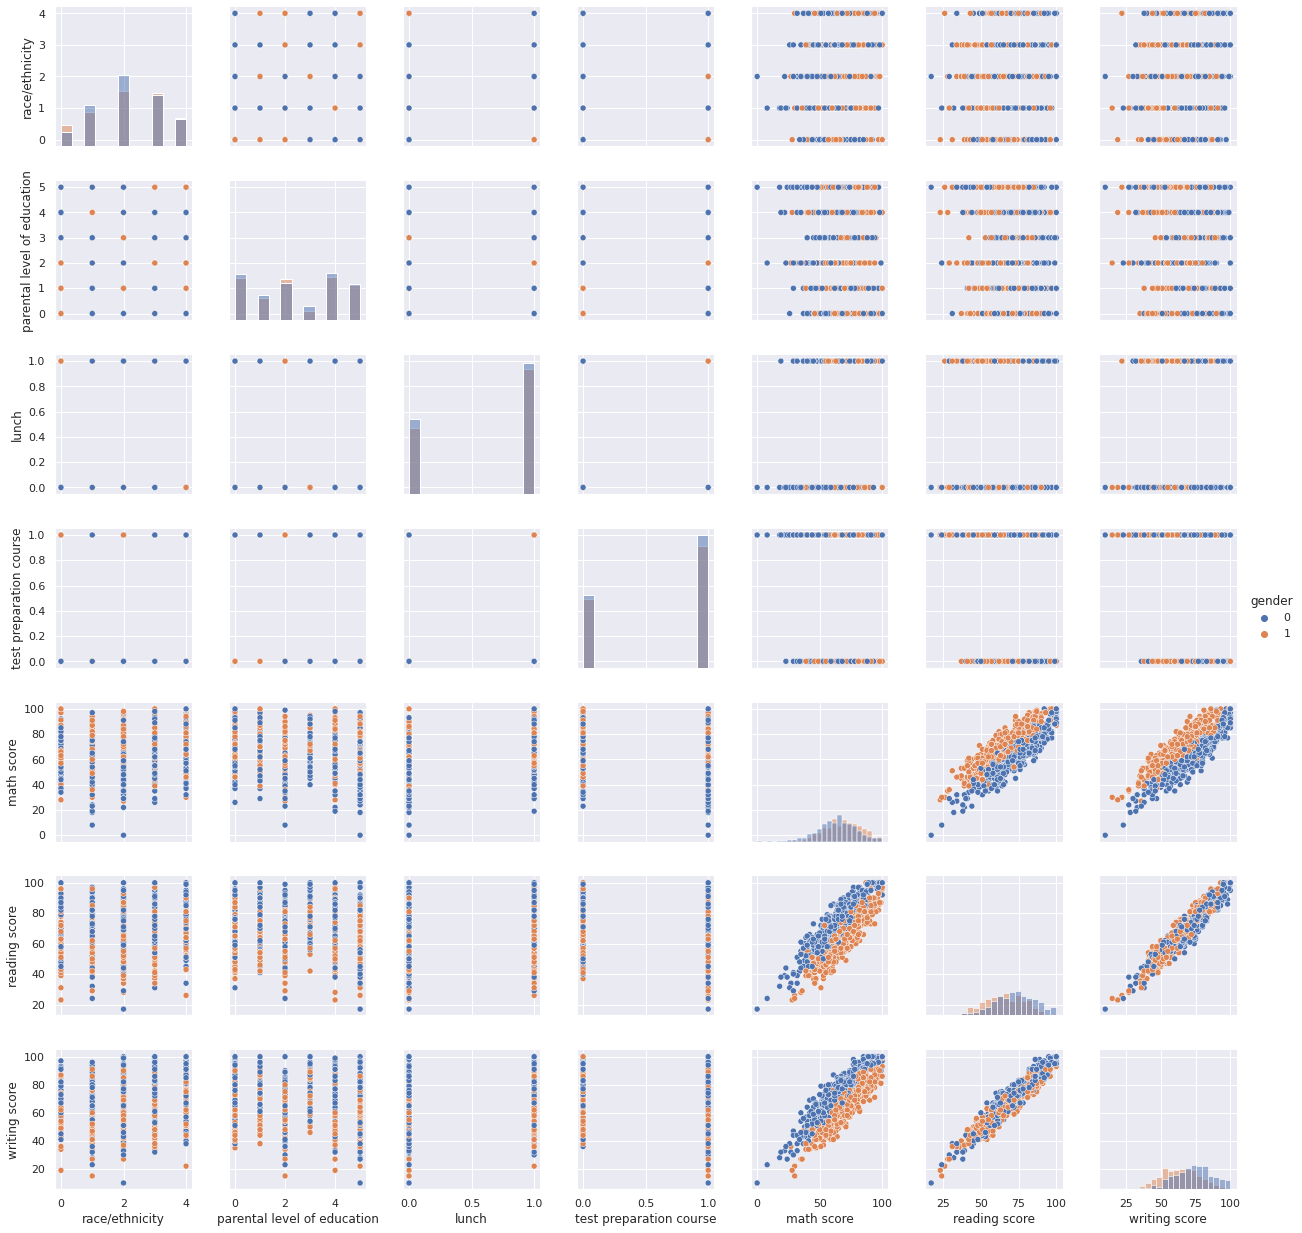

In [27]:
g = sns.PairGrid(df, hue="gender")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

###Distribution plots of math score with respect to race/ethnicity and gender

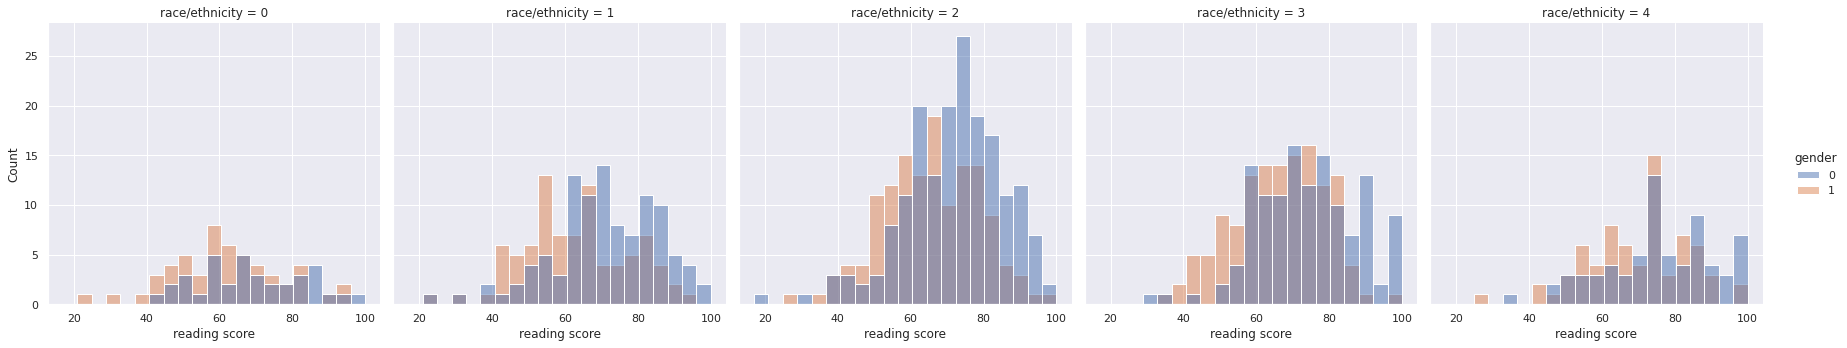

In [28]:
sns.displot(data=df, x="reading score", hue="gender", col="race/ethnicity", kind="hist")

###Histogram distribution plots

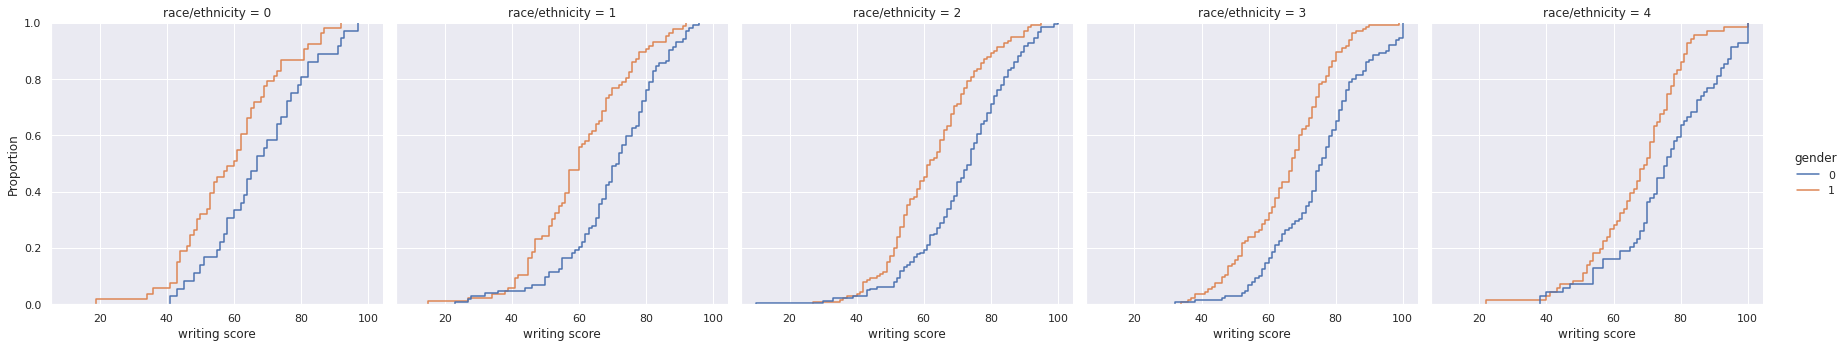

In [29]:
sns.displot(data=df, x="writing score", hue="gender", col="race/ethnicity", kind="ecdf")